<a href="https://colab.research.google.com/github/lmcanavals/machine_learning/blob/main/0502_CART_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

#### Imports and setup

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz as gv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#### Loading Data

In [ ]:
iris = load_iris(as_frame=True)

In [ ]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target
print(X.shape, y.shape)

(150, 2) (150,)


## Basic decision tree

In [11]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

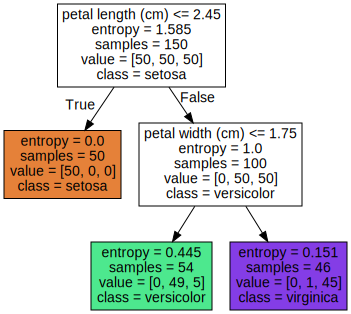

In [12]:
dot = export_graphviz(tree_clf,
                      feature_names=['petal length (cm)', 'petal width (cm)'],
                      class_names=iris.target_names,
                      filled=True)
gv.Source(dot)

## Entropy

$$
H_i = - \sum_{k=1}^{n}{p_{i,k} log_2(p_{i,k})}
$$
p_i, k^2: Ratio of class $k$ instances among training instances in the $i_{th}$ node



In [ ]:
custom_map = ListedColormap(["#fafab0", "#989800", "#a0faa0"])

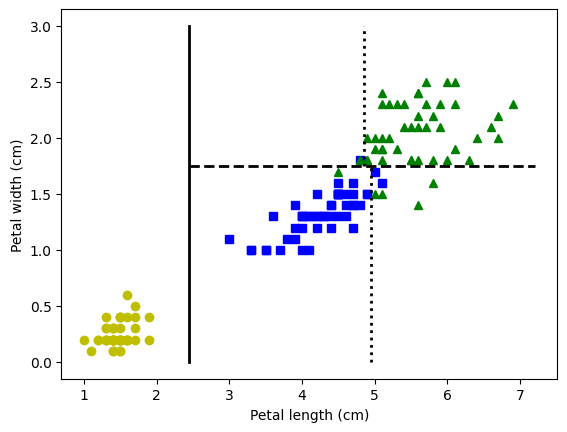

In [16]:
lengths, widths, = np.meshgrid(np.linspace(0, 0.72, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X[:, 0][y==idx], X[:, 1][y==idx], style, label=f"Iris {name}")

tree_clf_deeper = DecisionTreeClassifier(criterion='entropy',
                                         max_depth=3,
                                         random_state=42)
tree_clf_deeper.fit(X, y)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], 'k-', linewidth=2)
plt.plot([th0, 7.2], [th1, th1], 'k--', linewidth=2)
plt.plot([th2a, th2a], [0, th1], 'k:', linewidth=2)
plt.plot([th2b, th2b], [th1, 3], 'k:', linewidth=2)

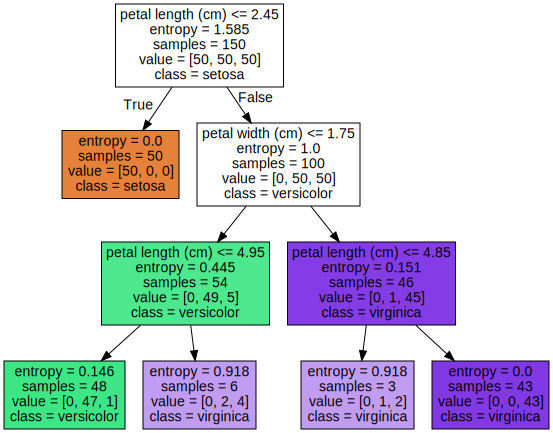

In [17]:
dot = export_graphviz(tree_clf_deeper,
                      feature_names=['petal length (cm)', 'petal width (cm)'],
                      class_names=iris.target_names,
                      filled=True)
gv.Source(dot)

In [18]:
tree_clf_deeper.predict_proba(X[100:]).round(3)

array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.979, 0.021],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.333, 0.667],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.333, 0.667],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.333, 0.667],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.